In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading Boston House data set
data=pd.read_csv("boston.csv")
data.shape

(506, 14)

In [3]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
#checking for null values in the data
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [6]:
#checking for duplicates in the data
data.duplicated().sum()

0

In [7]:
#statistical summary
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


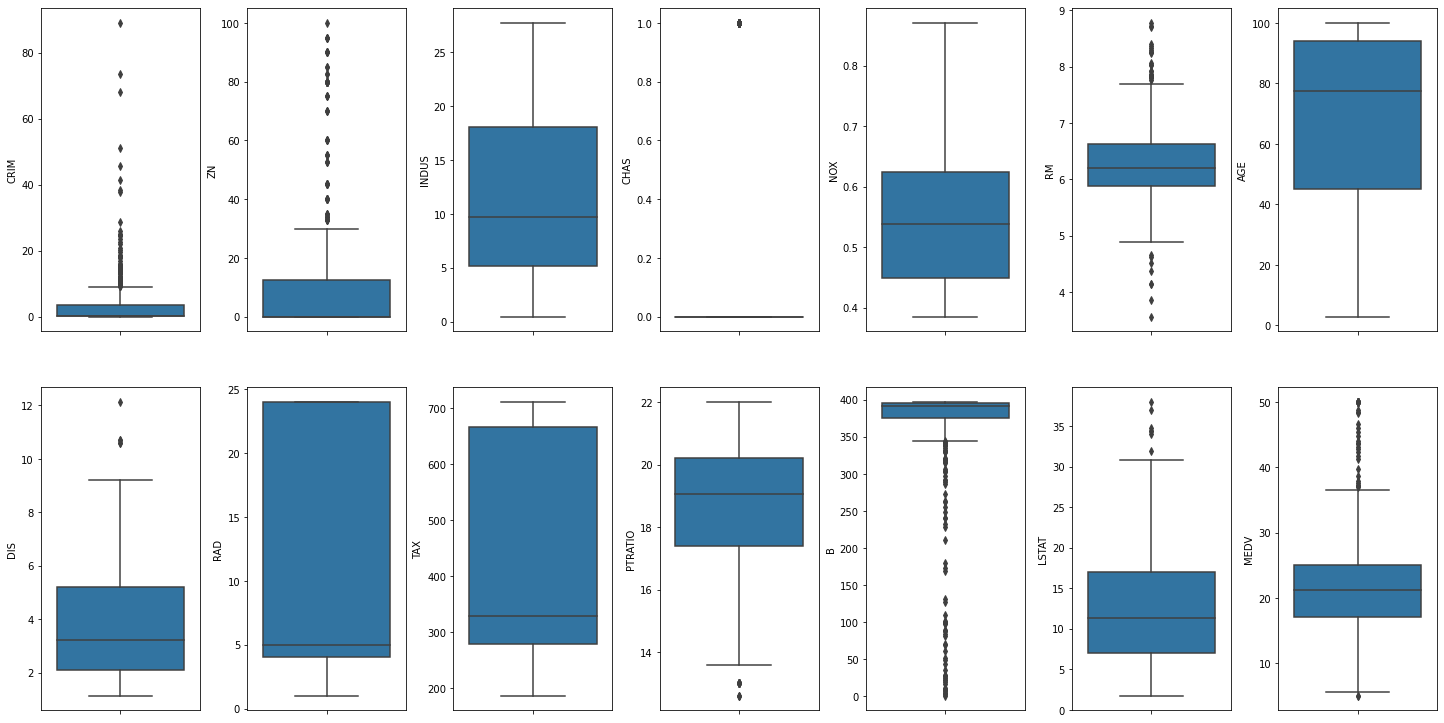

In [8]:
#visualising data
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col,value in data.items():
    sns.boxplot(y=col, data=data, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

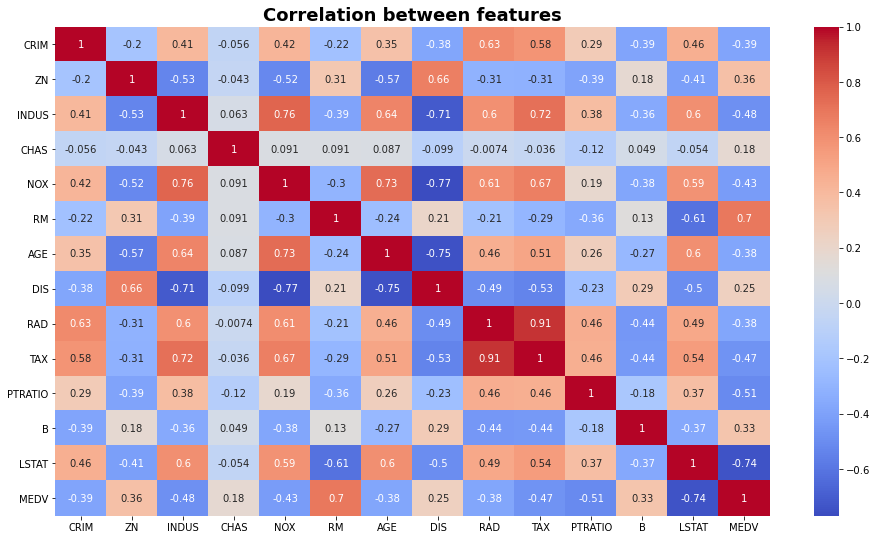

In [9]:
#correlation heatmap
plt.figure(figsize=(16,9))
sns.heatmap(data.corr(),cmap='coolwarm',annot=True)
plt.title("Correlation between features",weight='bold',fontsize=18)
plt.show()

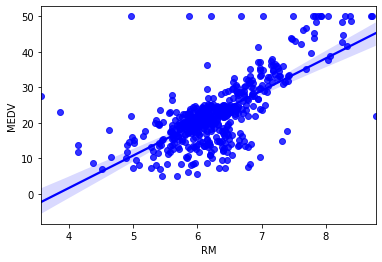

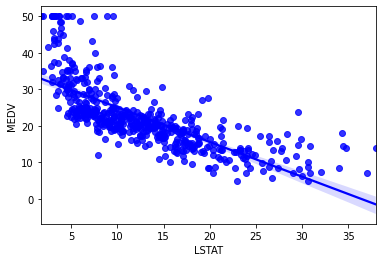

In [10]:
for i in ['RM','LSTAT']:
    sns.regplot(data[i],data['MEDV'],color='blue')
    plt.show()

In [11]:
#splitting the data
from sklearn.model_selection import train_test_split

data_train,data_test=train_test_split(data,test_size=0.33,random_state=42)

print(data_train.shape)
print(data_test.shape)

(339, 14)
(167, 14)


In [12]:
data_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
478,10.23300,0.0,18.10,0,0.614,6.185,96.7,2.1705,24,666.0,20.2,379.70,18.03,14.6
26,0.67191,0.0,8.14,0,0.538,5.813,90.3,4.6820,4,307.0,21.0,376.88,14.81,16.6
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
492,0.11132,0.0,27.74,0,0.609,5.983,83.5,2.1099,4,711.0,20.1,396.90,13.35,20.1
108,0.12802,0.0,8.56,0,0.520,6.474,97.1,2.4329,5,384.0,20.9,395.24,12.27,19.8


In [13]:
#normalizing the data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
num_vars=['CRIM','ZN','INDUS','NOX','RM','AGE','DIS','TAX','PTRATIO','B','LSTAT','MEDV']
data_train[num_vars]=scaler.fit_transform(data_train[num_vars])
data_test[num_vars]=scaler.fit_transform(data_test[num_vars])

In [14]:
data_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
478,0.114918,0.000000,0.636638,0,0.471193,0.472239,0.966014,0.094654,24,0.914122,0.808511,0.956629,0.449779,0.202703
26,0.007451,0.000000,0.261214,0,0.314815,0.396583,0.900103,0.323036,4,0.229008,0.893617,0.949518,0.360927,0.247748
7,0.001523,0.131579,0.251037,0,0.286008,0.469595,0.959835,0.438387,5,0.236641,0.276596,1.000000,0.480684,0.484234
492,0.001149,0.000000,1.000000,0,0.460905,0.431157,0.830072,0.089143,4,1.000000,0.797872,1.000000,0.320640,0.326577
108,0.001337,0.000000,0.277045,0,0.277778,0.531015,0.970134,0.118515,5,0.375954,0.882979,0.995814,0.290839,0.319820


In [15]:
y_train=data_train.pop('MEDV')
x_train=data_train
x_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
478,0.114918,0.000000,0.636638,0,0.471193,0.472239,0.966014,0.094654,24,0.914122,0.808511,0.956629,0.449779
26,0.007451,0.000000,0.261214,0,0.314815,0.396583,0.900103,0.323036,4,0.229008,0.893617,0.949518,0.360927
7,0.001523,0.131579,0.251037,0,0.286008,0.469595,0.959835,0.438387,5,0.236641,0.276596,1.000000,0.480684
492,0.001149,0.000000,1.000000,0,0.460905,0.431157,0.830072,0.089143,4,1.000000,0.797872,1.000000,0.320640
108,0.001337,0.000000,0.277045,0,0.277778,0.531015,0.970134,0.118515,5,0.375954,0.882979,0.995814,0.290839


In [16]:
y_test=data_test.pop('MEDV')
x_test=data_test
x_test.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
173,0.001162,0.0,0.131598,0,0.246347,0.552866,0.830490,0.154823,5,0.206501,0.400000,0.996450,0.180645
274,0.000682,0.4,0.218109,1,0.114823,0.619094,0.284648,0.304836,4,0.126195,0.511111,1.000000,0.019062
491,0.001352,0.0,1.000000,0,0.453027,0.469016,0.987207,0.073261,4,1.000000,0.788889,0.982783,0.445455
72,0.001160,0.0,0.379399,0,0.043841,0.484895,0.017058,0.431623,4,0.223709,0.688889,0.984812,0.077419
452,0.069142,0.0,0.646628,0,0.670146,0.529822,0.912580,0.125676,24,0.913958,0.800000,0.970054,0.421994


In [17]:
#fitting the training model
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(x_train,y_train)
model.coef_,model.intercept_

(array([-0.2579841 ,  0.08092807,  0.03478234,  0.07294298, -0.17699389,
         0.4321258 , -0.02810385, -0.35225357,  0.0052895 , -0.09693197,
        -0.19662142,  0.10512578, -0.44693252]),
 0.46908471787462797)

In [18]:
y_pred=model.predict(x_test)
y_pred

array([ 5.42589756e-01,  7.18670468e-01,  2.45799685e-01,  4.64188813e-01,
        3.08593503e-01,  4.11224906e-01,  2.75891282e-01,  2.05539605e-01,
        4.07210508e-01,  3.57757170e-01,  4.54506555e-01,  2.91260981e-01,
       -2.89142133e-01,  3.76716012e-01,  3.19108594e-01,  4.75806568e-01,
        3.52362189e-01,  1.04654907e-02,  7.92000098e-01,  2.78093062e-01,
        5.10747672e-01,  5.72504771e-01,  1.22813254e-01,  4.32743203e-01,
        2.96010970e-01,  2.49631207e-01,  4.15709936e-01,  2.03986044e-01,
        3.91417315e-01,  3.29281612e-01,  3.98653647e-01,  4.53903776e-01,
        4.48543846e-01,  3.14342956e-01,  2.59416174e-01,  2.93685121e-01,
        5.80251204e-01,  3.37628993e-01,  4.27802292e-01,  4.49228941e-01,
        2.05915303e-01,  6.06800638e-01,  8.41435084e-01,  2.78305667e-01,
        5.03565475e-01,  2.77295503e-01,  1.93254204e-01,  4.76373997e-01,
        3.43231538e-01,  5.71388121e-01,  3.59167192e-01,  6.56575029e-01,
        2.29173613e-01,  

In [19]:
#accuracy of our model
print("Training Accuracy:",model.score(x_train,y_train))
print("Testing Accuracy:",model.score(x_test,y_test))

Training Accuracy: 0.7392344370995028
Testing Accuracy: 0.7152840737918769


In [20]:
finalresult=pd.concat([y_test,x_test],axis=1)
finalresult

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
173,0.413333,0.001162,0.0,0.131598,0,0.246347,0.552866,0.830490,0.154823,5,0.206501,0.400000,0.996450,0.180645
274,0.608889,0.000682,0.4,0.218109,1,0.114823,0.619094,0.284648,0.304836,4,0.126195,0.511111,1.000000,0.019062
491,0.191111,0.001352,0.0,1.000000,0,0.453027,0.469016,0.987207,0.073261,4,1.000000,0.788889,0.982783,0.445455
72,0.395556,0.001160,0.0,0.379399,0,0.043841,0.484895,0.017058,0.431623,4,0.223709,0.688889,0.984812,0.077419
452,0.246667,0.069142,0.0,0.646628,0,0.670146,0.529822,0.912580,0.125676,24,0.913958,0.800000,0.970054,0.421994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,0.371111,0.001382,0.0,0.296921,0,0.267223,0.510070,0.513859,0.168606,5,0.374761,0.877778,0.991354,0.296774
321,0.402222,0.002384,0.0,0.253666,0,0.210856,0.545120,0.512793,0.353341,5,0.189293,0.733333,1.000000,0.117009
265,0.395556,0.010272,0.2,0.128666,0,0.532359,0.387103,0.603412,0.085671,5,0.145315,0.000000,0.988590,0.221994
29,0.355556,0.013548,0.0,0.281525,0,0.304802,0.602827,0.864606,0.321752,4,0.227533,0.888889,0.957731,0.266862


In [21]:
scale=MinMaxScaler()
scale.min_,scale.scale_=scaler.min_[11],scaler.scale_[11]

In [22]:
scaler.min_[11],scaler.scale_[11]

(-0.11111111111111112, 0.022222222222222223)

In [23]:
y_predict=pd.DataFrame(y_pred,columns=['MEDV'])

In [24]:
#predicted values
scale.inverse_transform(y_predict)

array([[29.41653902],
       [37.34017105],
       [16.06098584],
       [25.88849659],
       [18.88670764],
       [23.50512077],
       [17.41510767],
       [14.2492822 ],
       [23.32447287],
       [21.09907267],
       [25.45279496],
       [18.10674413],
       [-8.01139599],
       [21.95222053],
       [19.35988671],
       [26.41129554],
       [20.85629851],
       [ 5.47094708],
       [40.64000442],
       [17.51418777],
       [27.98364525],
       [30.76271471],
       [10.52659645],
       [24.47344413],
       [18.32049367],
       [16.23340433],
       [23.70694712],
       [14.17937199],
       [22.61377918],
       [19.81767254],
       [22.9394141 ],
       [25.42566994],
       [25.18447307],
       [19.14543301],
       [16.67372781],
       [18.21583043],
       [31.11130419],
       [20.19330468],
       [24.25110315],
       [25.21530236],
       [14.26618864],
       [32.3060287 ],
       [42.86457877],
       [17.52375501],
       [27.66044638],
       [17